In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# **Imported all libraries and now importing the dataset from the web using its url and now as it is not having the header row attached, we are adding header rows then loading it in a dataframe**


In [100]:


# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
columns = ['ID', 'Diagnosis'] + ['radius1', 'texture1', 'perimeter1', 'area1',
                                 'smoothness1', 'compactness1', 'concavity1',
                                 'concave_points1', 'symmetry1', 'fractal_dimension1',
                                 'radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2',
                                 'compactness2', 'concavity2', 'concave_points2', 'symmetry2',
                                 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
                                 'area3', 'smoothness3', 'compactness3', 'concavity3',
                                 'concave_points3', 'symmetry3', 'fractal_dimension3']
data = pd.read_csv(url, header=None, names=columns)

# Show the first few rows
print(data.head())

         ID Diagnosis  radius1  texture1  perimeter1   area1  smoothness1  \
0    842302         M    17.99     10.38      122.80  1001.0      0.11840   
1    842517         M    20.57     17.77      132.90  1326.0      0.08474   
2  84300903         M    19.69     21.25      130.00  1203.0      0.10960   
3  84348301         M    11.42     20.38       77.58   386.1      0.14250   
4  84358402         M    20.29     14.34      135.10  1297.0      0.10030   

   compactness1  concavity1  concave_points1  ...  radius3  texture3  \
0       0.27760      0.3001          0.14710  ...    25.38     17.33   
1       0.07864      0.0869          0.07017  ...    24.99     23.41   
2       0.15990      0.1974          0.12790  ...    23.57     25.53   
3       0.28390      0.2414          0.10520  ...    14.91     26.50   
4       0.13280      0.1980          0.10430  ...    22.54     16.67   

   perimeter3   area3  smoothness3  compactness3  concavity3  concave_points3  \
0      184.60  2019.0  

# checking the first five rows

In [102]:
data.head(10)

,ID,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


# checking the last 10 rows

In [104]:
data.tail(10)

,ID,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
559,925291,B,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,...,12.480,37.16,82.28,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732
560,925292,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321
561,925311,B,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,...,11.920,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905
562,925622,M,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,...,17.520,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.23560,0.4089,0.14090
563,926125,M,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,...,24.290,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.25420,0.2929,0.09873
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.22160,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.16280,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.14180,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.26500,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.00000,0.2871,0.07039


# checking the shape

In [106]:
data.shape

(569, 32)

# Checking the distribution of Benign and Malignant

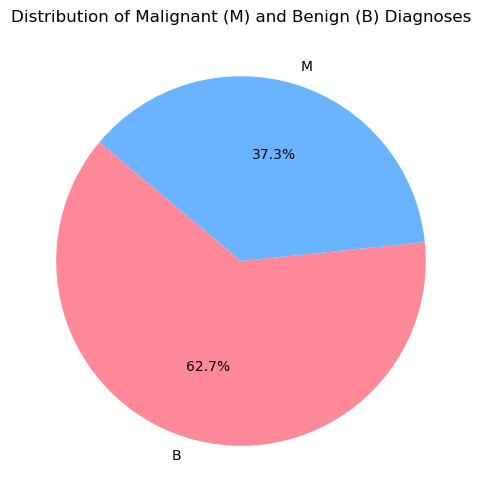

In [108]:
# Count the occurrences of 'M' and 'B' in the 'Diagnosis' column
diagnosis_counts = data['Diagnosis'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(6, 6))
plt.pie(diagnosis_counts, labels=diagnosis_counts.index, autopct='%1.1f%%', startangle=140, colors=['#FF8999', '#69B3FF'])
plt.title("Distribution of Malignant (M) and Benign (B) Diagnoses")
plt.show()

# checking the Info of each variables 

In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  569 non-null    int64  
 1   Diagnosis           569 non-null    object 
 2   radius1             569 non-null    float64
 3   texture1            569 non-null    float64
 4   perimeter1          569 non-null    float64
 5   area1               569 non-null    float64
 6   smoothness1         569 non-null    float64
 7   compactness1        569 non-null    float64
 8   concavity1          569 non-null    float64
 9   concave_points1     569 non-null    float64
 10  symmetry1           569 non-null    float64
 11  fractal_dimension1  569 non-null    float64
 12  radius2             569 non-null    float64
 13  texture2            569 non-null    float64
 14  perimeter2          569 non-null    float64
 15  area2               569 non-null    float64
 16  smoothne

# 5 point Summary of the Data

In [112]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius1,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture1,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter1,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area1,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness1,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness1,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity1,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave_points1,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry1,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


## Created a function so that the number of outliers in each columns could be found in a single go

In [114]:
# Replace 'age' with the desired column name
def outlier_test(column_name,data_frame):
    # Calculate the IQR (Interquartile Range)
    Q1 = data_frame[column_name].quantile(0.25)
    Q3 = data_frame[column_name].quantile(0.75)
    IQR = Q3 - Q1
    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
 
    # Identify outliers
    outliers = data_frame[(data[column_name] < lower_bound) | (data_frame[column_name] > upper_bound)]
 
    # Get the number of outliers
    num_outliers = len(outliers)
 
    # Display the number of outliers for the specified column
    print(f"Number of outliers for '{column_name}': {num_outliers}")

## Passing the names of all the columns as string

In [116]:
for i in data.select_dtypes(include=['float64', 'int64']).columns:
    outlier_test(i,data)

Number of outliers for 'ID': 81
Number of outliers for 'radius1': 14
Number of outliers for 'texture1': 7
Number of outliers for 'perimeter1': 13
Number of outliers for 'area1': 25
Number of outliers for 'smoothness1': 6
Number of outliers for 'compactness1': 16
Number of outliers for 'concavity1': 18
Number of outliers for 'concave_points1': 10
Number of outliers for 'symmetry1': 15
Number of outliers for 'fractal_dimension1': 15
Number of outliers for 'radius2': 38
Number of outliers for 'texture2': 20
Number of outliers for 'perimeter2': 38
Number of outliers for 'area2': 65
Number of outliers for 'smoothness2': 30
Number of outliers for 'compactness2': 28
Number of outliers for 'concavity2': 22
Number of outliers for 'concave_points2': 19
Number of outliers for 'symmetry2': 27
Number of outliers for 'fractal_dimension2': 28
Number of outliers for 'radius3': 17
Number of outliers for 'texture3': 5
Number of outliers for 'perimeter3': 15
Number of outliers for 'area3': 35
Number of o

## Created a function so that the distribution of each columns could be found in a single go


In [118]:
def histplot_test(val):
    sns.histplot(data[val],bins=10,kde=True)
    plt.xlabel("value")
    plt.ylabel("Freequency")
    plt.title(f"histogram of {val}")
    plt.show()

### Passing the names of all the columns as string

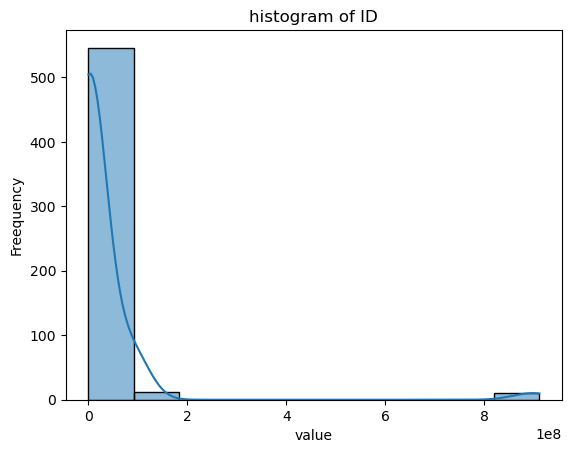

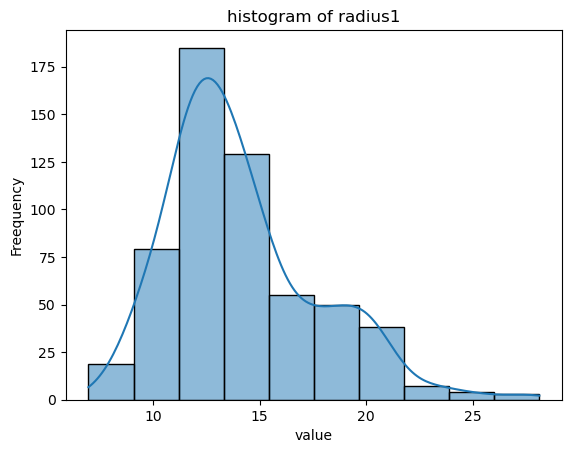

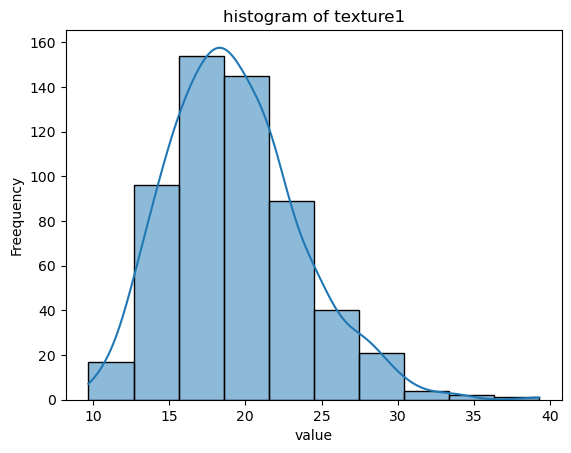

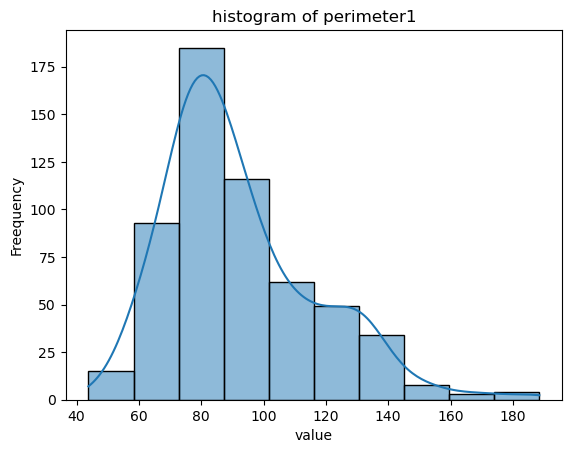

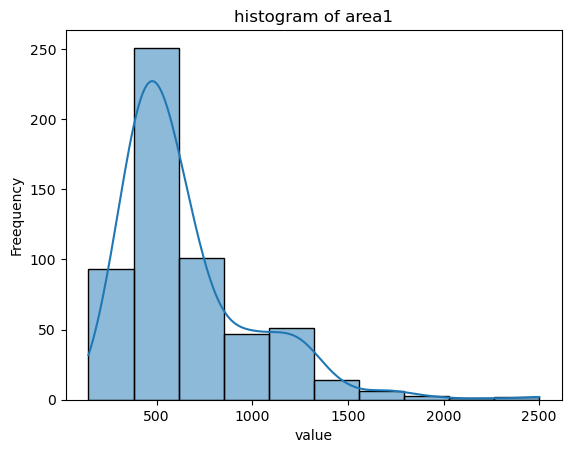

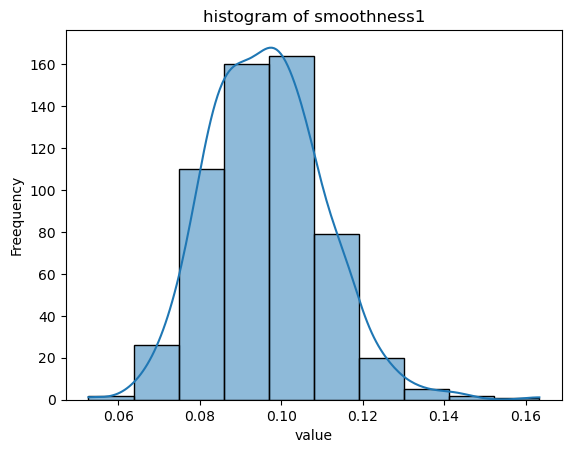

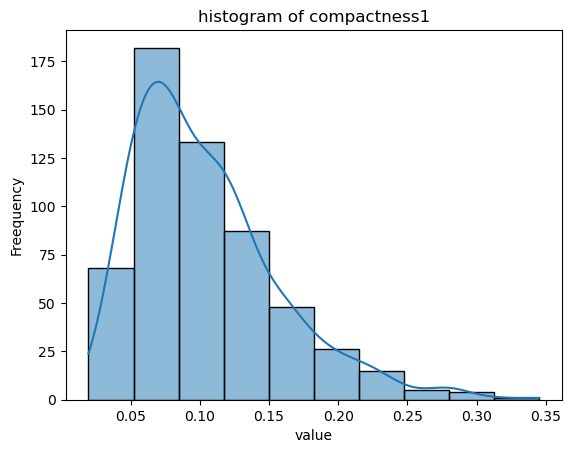

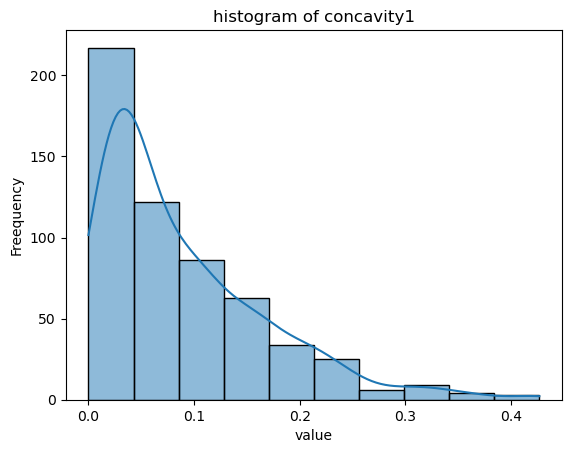

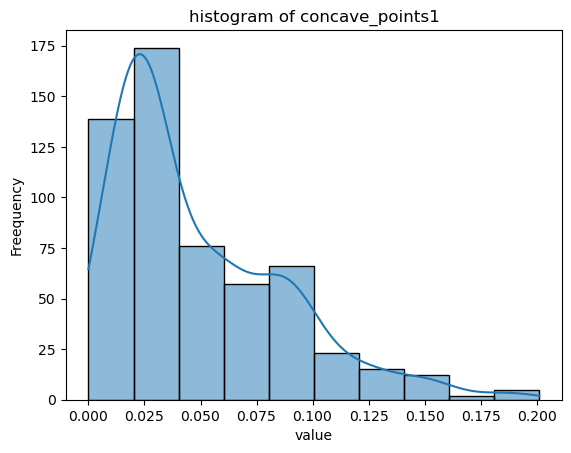

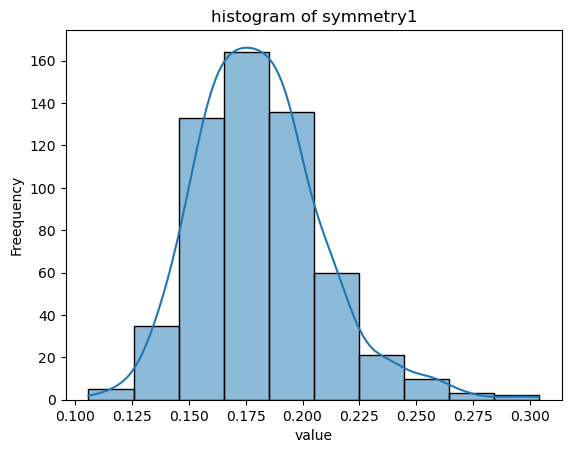

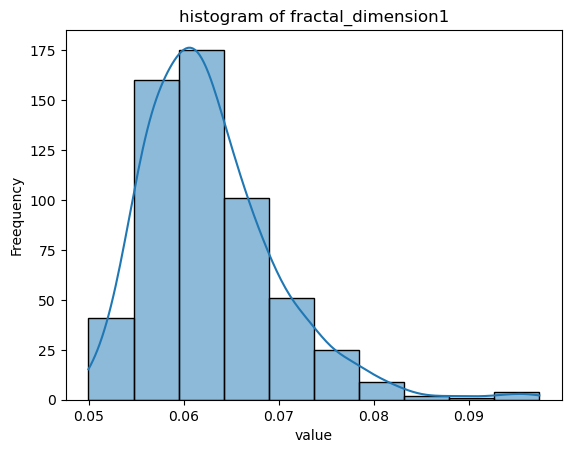

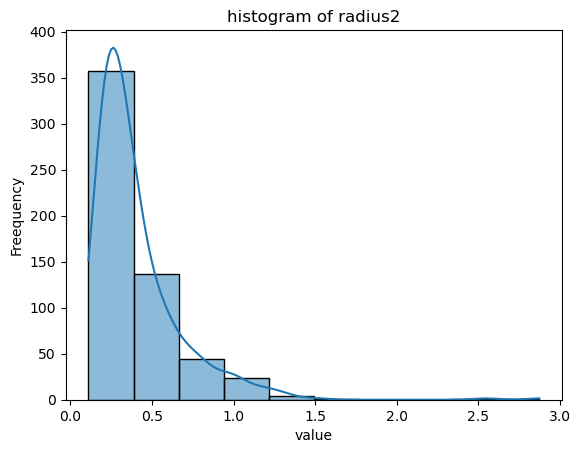

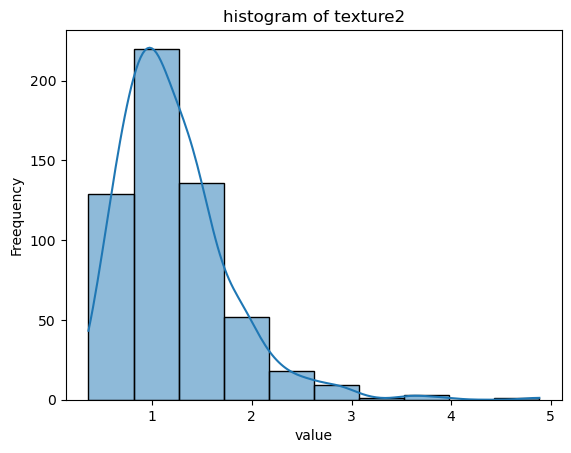

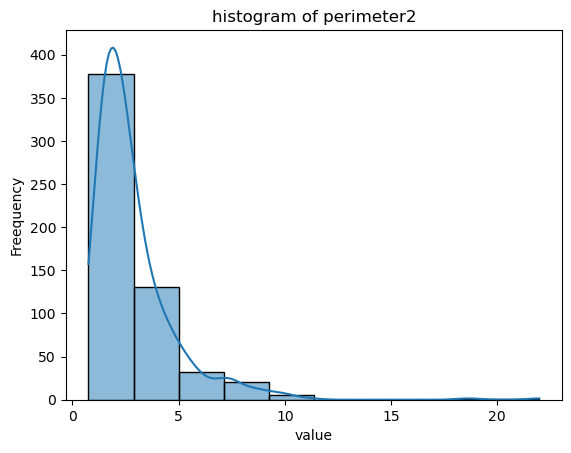

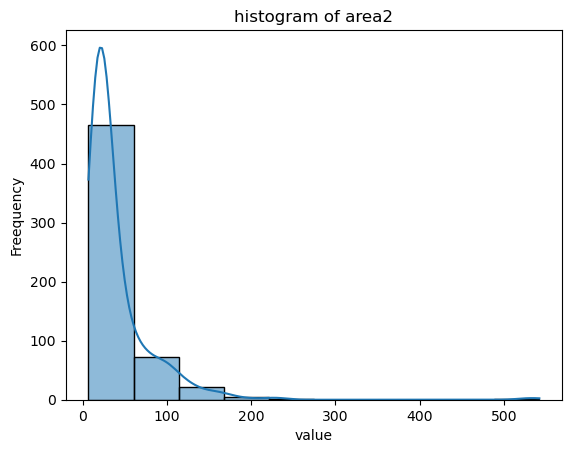

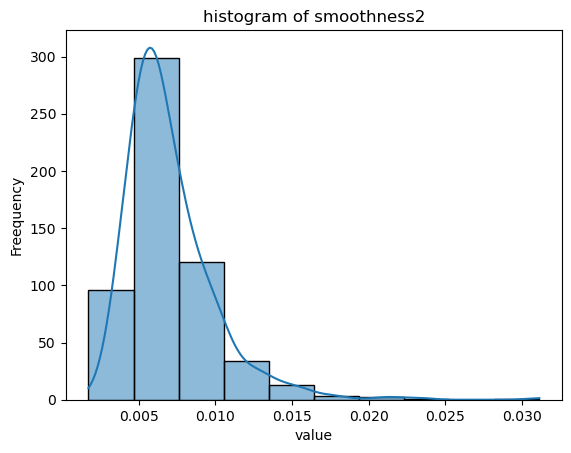

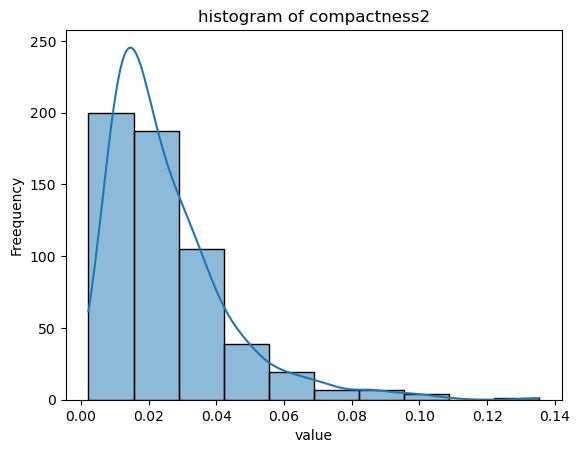

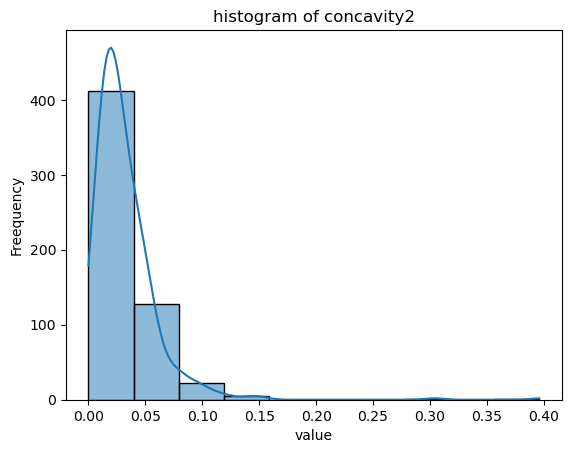

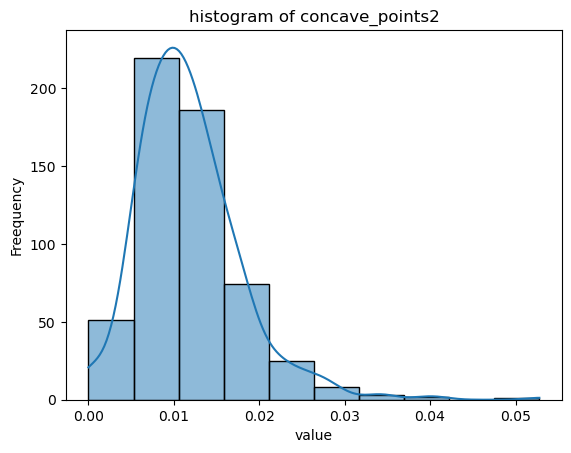

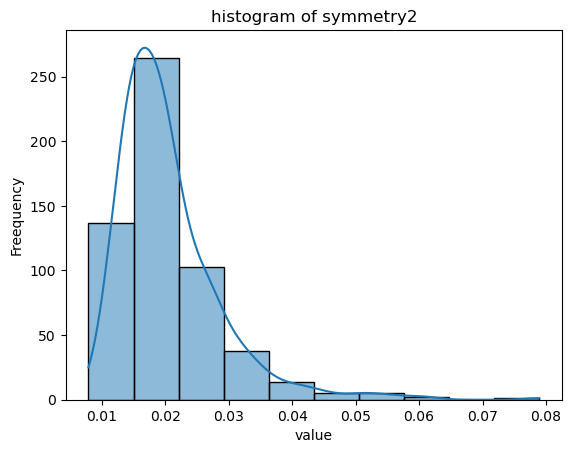

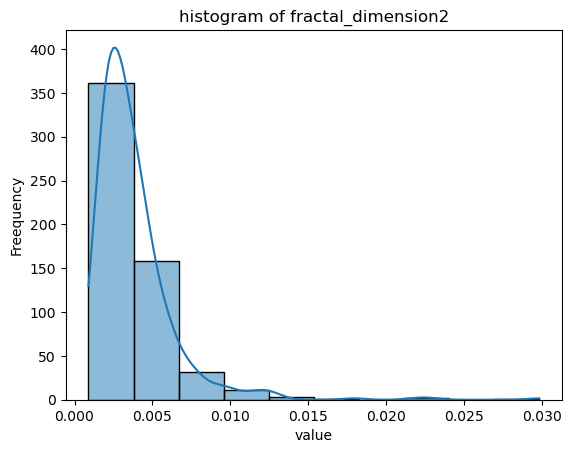

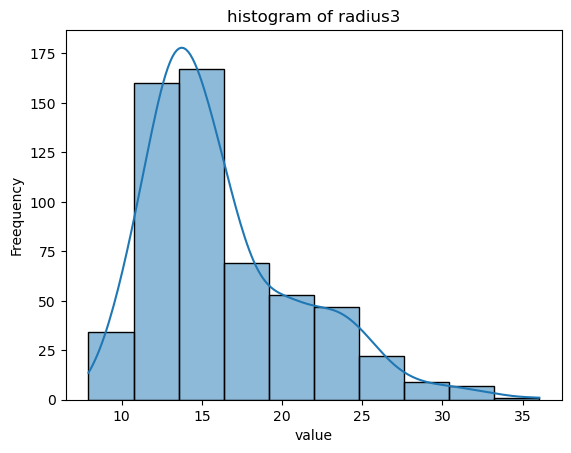

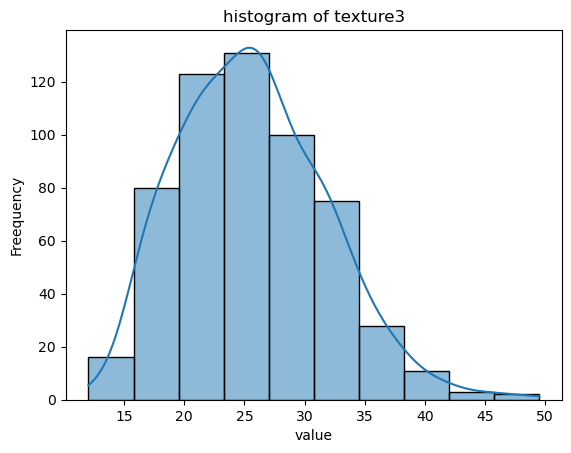

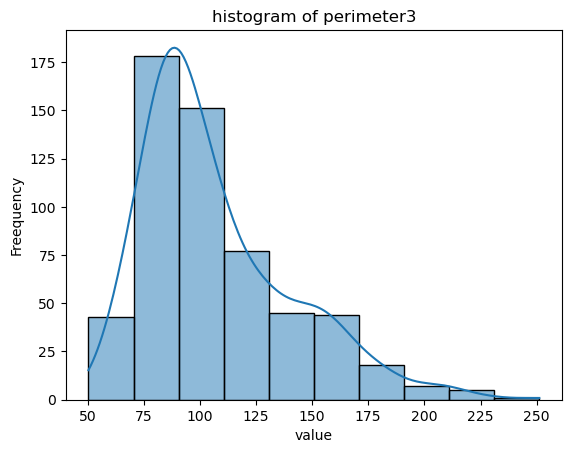

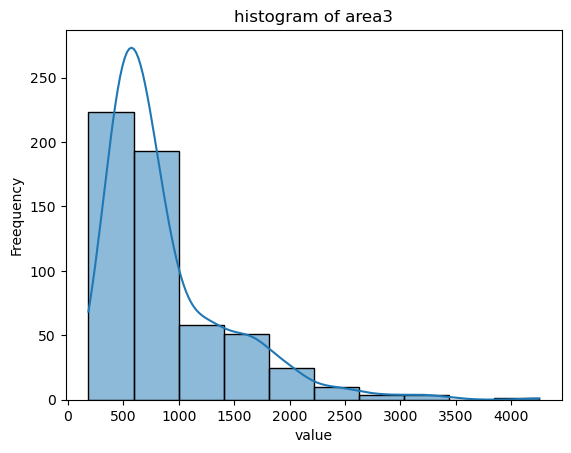

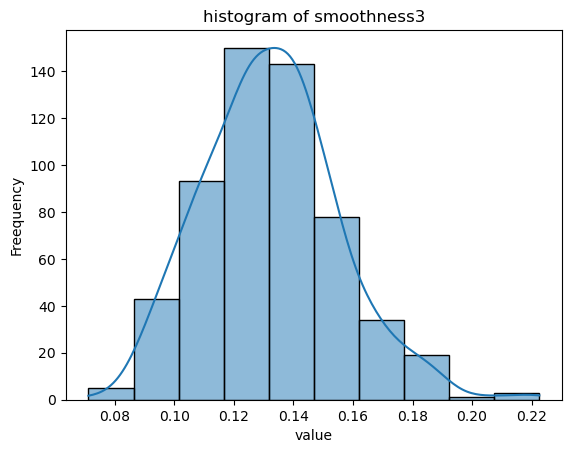

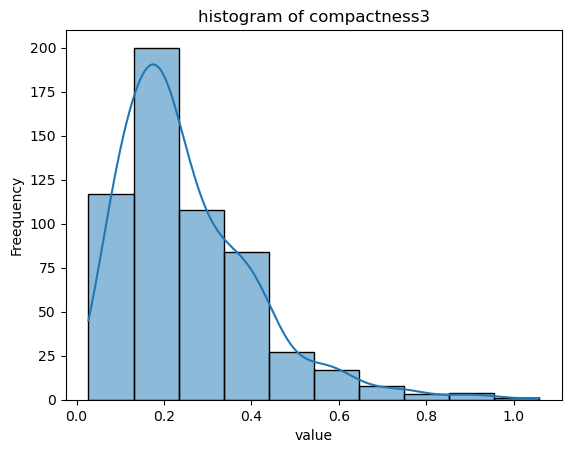

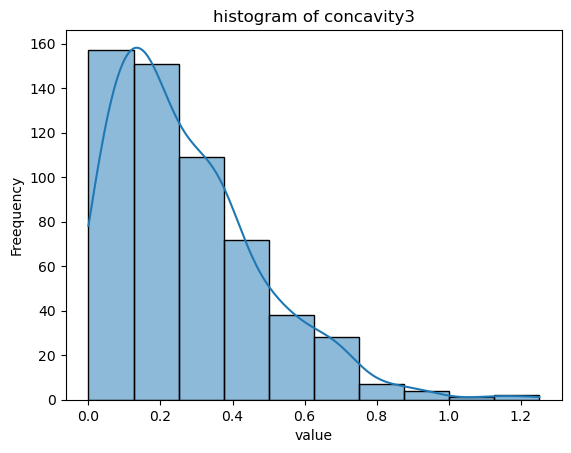

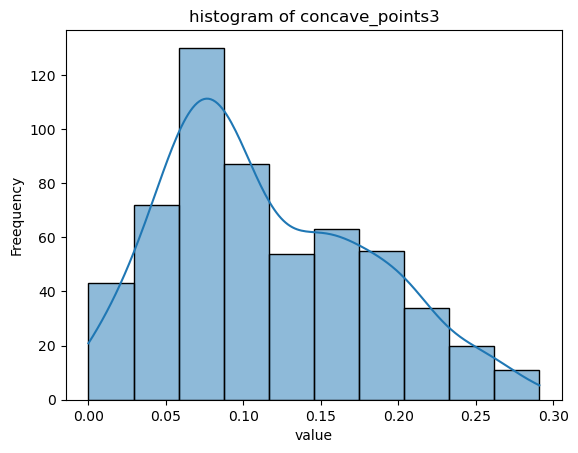

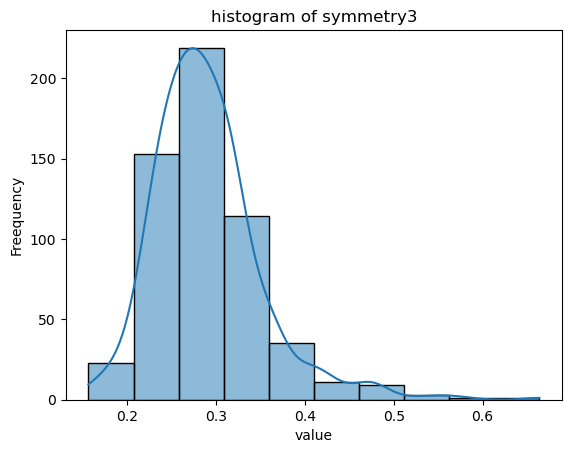

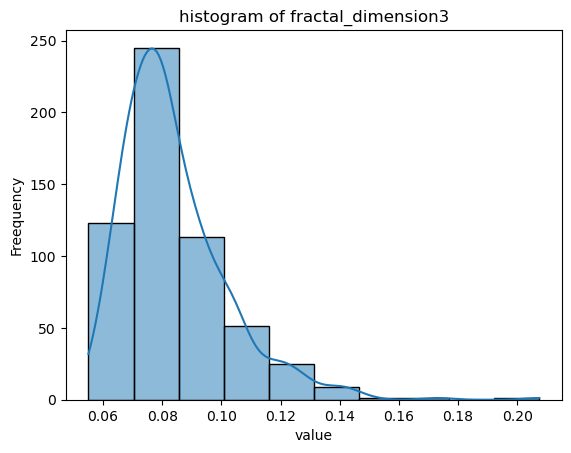

In [120]:
for i in data.select_dtypes(include=['float64','int64']):
    histplot_test(i)

# checking duplicated values

In [122]:
data.duplicated().sum()


0

# checking null values

In [124]:
data.isnull().sum()

ID                    0
Diagnosis             0
radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
dtype: int64

# Droping the Id Column as it is Prima facia makes no sense to be added

In [126]:
data.drop('ID', axis=1, inplace=True)

In [127]:
data['Diagnosis']

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: Diagnosis, Length: 569, dtype: object

## converting Diagnosis column into two categories(numerical) , Malignant becomes 1 and Benign Becomes 0

In [129]:
data['Diagnosis'] = data['Diagnosis'].map({'M': 1, 'B': 0})

In [130]:
data['Diagnosis']

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: Diagnosis, Length: 569, dtype: int64

# creating two versions of the code so that we could compare the two versions(outlier smoothed and raw) 

In [132]:
data_raw=data.copy()
data_smoothed=data.copy()

# creating a new function so that we can transfer thre data anytime to be smoothed

In [134]:
def outlier_smooth(column_name,data_frame):
    # Calculate the IQR (Interquartile Range)
    Q1 = data_frame[column_name].quantile(0.25)
    Q3 = data_frame[column_name].quantile(0.75)
    IQR = Q3 - Q1
    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Calculate the median of the column
    median_value = data_frame[column_name].median()
 
    # Identify outliers
    outliers = (data_frame[column_name] < lower_bound) | (data_frame[column_name] > upper_bound)
    data_frame.loc[outliers, column_name] = median_value

    # Print if any changes were made
    if outliers.any():
        print(f"{column_name} changed")
    # Get the number of outliers
    #num_outliers = len(outliers)
 
    # Display the number of outliers for the specified column
    #print(f"Number of outliers for '{column_name}': {num_outliers}")

In [155]:
for i in data_smoothed.drop('Diagnosis',axis = 1).columns:
    outlier_smooth(i,data_smoothed)

radius1 changed
texture1 changed
perimeter1 changed
area1 changed
smoothness1 changed
compactness1 changed
concavity1 changed
concave_points1 changed
symmetry1 changed
fractal_dimension1 changed
radius2 changed
texture2 changed
perimeter2 changed
area2 changed
smoothness2 changed
compactness2 changed
concavity2 changed
concave_points2 changed
symmetry2 changed
fractal_dimension2 changed
radius3 changed
texture3 changed
perimeter3 changed
area3 changed
smoothness3 changed
compactness3 changed
concavity3 changed
symmetry3 changed
fractal_dimension3 changed


In [157]:
data_smoothed.describe().T

,count,mean,std,min,25%,50%,75%,max
Diagnosis,569.0,0.372583,0.483918,0.000000,0.000000,0.000000,1.000000,1.000000
radius1,569.0,13.853039,3.099936,6.981000,11.700000,13.370000,15.460000,21.750000
texture1,569.0,19.114429,4.003634,9.710000,16.170000,18.840000,21.600000,29.970000
perimeter1,569.0,90.144288,21.405756,43.790000,75.170000,86.240000,102.400000,147.300000
area1,569.0,605.705448,267.718895,143.500000,420.300000,551.100000,710.600000,1326.000000
smoothness1,569.0,0.096000,0.013126,0.062510,0.086410,0.095870,0.104900,0.133500
compactness1,569.0,0.099398,0.044548,0.019380,0.064920,0.092630,0.127500,0.228400
concavity1,569.0,0.079950,0.064976,0.000000,0.029560,0.061540,0.116800,0.281000
concave_points1,569.0,0.046425,0.034899,0.000000,0.020310,0.033500,0.068470,0.152000
symmetry1,569.0,0.179200,0.023715,0.116700,0.162000,0.179200,0.194300,0.245900


In [159]:
data_smoothed['Diagnosis'].value_counts()

Diagnosis
0    357
1    212
Name: count, dtype: int64

In [161]:
for i in data_smoothed.drop('Diagnosis',axis = 1).columns:
    outlier_test(i,data_smoothed)

Number of outliers for 'radius1': 6
Number of outliers for 'texture1': 2
Number of outliers for 'perimeter1': 4
Number of outliers for 'area1': 40
Number of outliers for 'smoothness1': 2
Number of outliers for 'compactness1': 6
Number of outliers for 'concavity1': 8
Number of outliers for 'concave_points1': 9
Number of outliers for 'symmetry1': 2
Number of outliers for 'fractal_dimension1': 7
Number of outliers for 'radius2': 28
Number of outliers for 'texture2': 5
Number of outliers for 'perimeter2': 21
Number of outliers for 'area2': 52
Number of outliers for 'smoothness2': 9
Number of outliers for 'compactness2': 9
Number of outliers for 'concavity2': 13
Number of outliers for 'concave_points2': 6
Number of outliers for 'symmetry2': 14
Number of outliers for 'fractal_dimension2': 13
Number of outliers for 'radius3': 21
Number of outliers for 'texture3': 0
Number of outliers for 'perimeter3': 13
Number of outliers for 'area3': 48
Number of outliers for 'smoothness3': 2
Number of outl

# Part 1 : Unsmoothen data

## Splitting the data into input and output variable(independant and dependant)
## splitting into training and testing data
## showing the shape after the train test split 

In [165]:


# Define features and target variable
X = data_raw.drop('Diagnosis', axis=1)  # All columns except Diagnosis
y = data_raw['Diagnosis']

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f'Training data shape: {X_train.shape}')
print(f'Testing data shape: {X_test.shape}')

Training data shape: (398, 30)
Testing data shape: (171, 30)


In [167]:
performance_df = pd.DataFrame(columns = ['Model Name','Train Accuracy', 'Train F1 score',
 'Test Accuracy', 'Test F1 Score', 'AUC Score','Remarks'])
def perf(model, name):
 global performance_df
 pred_train = model.predict(xtrain)
 pred_test = model.predict(xtest)
 pred_prob = model.predict_proba(xtest)[:,1]
 
 train_acc = accuracy_score(ytrain, pred_train)
 test_acc = accuracy_score(ytest, pred_test)
 train_f1 = f1_score(ytrain, pred_train)
 test_f1 = f1_score(ytest, pred_test)
 
 remarks = 'Overfit' if abs(train_acc - test_acc) > 0.02 or train_acc > 0.95 else \
 'Underfit' if train_acc < 0.80 or test_acc < 0.80 else 'Good Fit'
 
 performance_df = performance_df.append({'Model Name':name,'Train Accuracy':train_acc, 
 'Train F1 score':train_f1,
'Test Accuracy':test_acc,'Test F1 Score':test_f1,
 'AUC Score': round(roc_auc_score(ytest,pred_test),4),
 'Remarks':remarks}, ignore_index=True)
 
 # plotting roc_curve and calculating auc_score
 
 fpr , tpr , threshold = roc_curve(ytest,pred_prob)
 
 plt.figure(figsize = (5,5))
 plt.plot(fpr,tpr)
 plt.plot([0.0,1.0],'r--')
 plt.text(x = 0.1, y = 1.0, s = ('auc_score',round(roc_auc_score(ytest,pred_test),4)))
 
 print(classification_report(ytest,pred_test))
